# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head(n = 3)

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [3]:
sinasc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

In [5]:
print("Valores únicos da variável Latitude: ", sinasc_raw['munResLat'].unique())

Valores únicos da variável Latitude:  [-11.93554 -12.13178 -11.70974 -11.72226 -11.91439  -9.90846  -9.37819
  -9.71667 -10.2631  -10.43595  -9.70554  -8.76889 -10.33887  -9.19187
 -10.88205 -10.20981 -12.74137  -9.85139  -8.78502 -12.43601 -10.56842
  -9.42556 -13.13056 -10.41177 -11.12855 -10.72357 -12.99752 -11.69949
 -10.61207 -11.90842 -11.67754 -11.04561 -13.19503 -11.17321 -11.43387
 -12.17983 -11.52855 -12.0638  -11.19624 -11.72133 -11.34413 -11.82571
 -11.76712       nan -11.42684 -12.55684 -10.77388 -10.24873 -10.91553
 -10.93217 -10.43105 -13.47656 -13.49976]


In [9]:
print("Valores únicos da variável área municipios: ", sinasc_raw['munResArea'].unique())

Valores únicos da variável área municipios:  [ 7067.025  3958.273   843.446  1457.888   541.647  4426.571  3863.943
  2651.822  1931.378  2944.128  1717.64  34096.394  1961.778  4081.583
  6896.648  3265.809 11518.915  3135.106  6843.868  4987.177  3442.005
  8509.27   1451.06  10071.643   831.857  1969.85   3060.321  7460.219
  5067.384  1197.796  6240.932  1191.875  2783.3    1758.465  3792.998
  2548.683  4518.035 10959.767   798.083  1703.008  3029.189   605.692
  3773.505       nan   892.842  5126.723 24855.724  2197.413   807.126
   459.978   965.676  6014.733  1314.352]


In [11]:
print("Valores únicos da variável Altitude: ", sinasc_raw['munResAlt'].unique())

Valores únicos da variável Altitude:  [338. 397. 230. 227. 270. 139. 111. 128. 155. 163. 124.  87. 161.  99.
 157. 153. 595. 158.  85. 145. 206. 144. 419. 151. 197. 252. 269. 191.
 202. 265. 186. 212. 263. 178. 177. 296. 166. 266. 259. 182. 245.  nan
 215. 340. 133. 192. 241. 154. 170. 236.]


In [13]:
print("Valores únicos da variável Municipio: ", sinasc_raw['munResNome'].unique())

Valores únicos da variável Municipio:  ["Alta Floresta D'Oeste" 'Alto Alegre dos Parecis'
 'Novo Horizonte do Oeste' 'Rolim de Moura' "São Felipe D'Oeste"
 'Ariquemes' 'Cujubim' 'Alto Paraíso' 'Monte Negro' 'Jaru' 'Rio Crespo'
 'Porto Velho' 'Cacaulândia' 'Itapuã do Oeste' 'Ji-Paraná' 'Buritis'
 'Vilhena' 'Vale do Anari' 'Candeias do Jamari' 'Costa Marques'
 'Campo Novo de Rondônia' "Machadinho D'Oeste" 'Colorado do Oeste'
 'Nova Mamoré' 'Urupá' 'Ouro Preto do Oeste' 'Corumbiara'
 'São Miguel do Guaporé' 'Governador Jorge Teixeira' "Santa Luzia D'Oeste"
 'Pimenta Bueno' 'Mirante da Serra' 'Cerejeiras' 'Presidente Médici'
 'Cacoal' 'Parecis' "Espigão D'Oeste" 'São Francisco do Guaporé'
 'Ministro Andreazza' "Nova Brasilândia D'Oeste" "Alvorada D'Oeste"
 'Primavera de Rondônia' 'Seringueiras' 'Município ignorado - RO'
 'Castanheiras' 'Chupinguaia' 'Guajará-Mirim' 'Theobroma' 'Nova União'
 'Teixeirópolis' 'Vale do Paraíso' 'Pimenteiras do Oeste' 'Cabixi']


In [15]:
print("Quantidade de valores NaN na coluna munResLat: ", sinasc_raw['munResLat'].isna().sum())

Quantidade de valores NaN na coluna munResLat:  1


In [17]:
print("Quantidade de valores NaN na coluna munResArea: ", sinasc_raw['munResArea'].isna().sum())

Quantidade de valores NaN na coluna munResArea:  1


In [19]:
print("Quantidade de valores NaN na coluna munResAlt: ", sinasc_raw['munResArea'].isna().sum())

Quantidade de valores NaN na coluna munResAlt:  1


In [21]:
print("Quantidade de valores NaN na coluna munResNome: ", sinasc_raw['munResNome'].isna().sum())

Quantidade de valores NaN na coluna munResNome:  0


In [23]:
# excluir valores NaN da coluna 'munResLat'
sinasc_raw_lat = sinasc_raw.dropna(subset = ['munResLat'])

In [25]:
# excluir valores NaN da coluna 'munResArea'
sinasc_raw_area = sinasc_raw.dropna(subset = ['munResArea'])

In [27]:
# excluir valores NaN da coluna 'munResArea'
sinasc_raw_alt = sinasc_raw.dropna(subset = ['munResAlt'])

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [29]:
# uso do método .copy() para criar um df independente
sinasc_raw_lat_copy = sinasc_raw_lat.copy()

# criar coluna 'faixalat'
sinasc_raw_lat_copy['faixaLat'] = ""

# agrupar dados a partir da variável munResLat
sinasc_raw_lat_copy.loc[sinasc_raw_lat_copy['munResLat'] >= -10.5, 'faixaLat'] = "Acima_de_10.5"
sinasc_raw_lat_copy.loc[sinasc_raw_lat_copy['munResLat'] < -10.5, 'faixaLat'] = "Abaixo_de_10.5"

#### Vamos usar as variáveis APGAR1 e APGAR5

In [31]:
apgar1_por_faixa_lat = sinasc_raw_lat_copy.groupby('faixaLat')['APGAR1'].agg(['sum','mean','median','max','min','std','var'])
apgar1_por_faixa_lat

,sum,mean,median,max,min,std,var
faixaLat,,,,,,,
Abaixo_de_10.5,104590.0,8.070216,8.0,10.0,0.0,0.960767,0.923073
Acima_de_10.5,114559.0,8.199771,8.0,10.0,0.0,1.002839,1.005686


In [33]:
apgar5_por_faixa_lat = sinasc_raw_lat_copy.groupby('faixaLat')['APGAR5'].agg(['sum','mean','median','max','min','std','var'])
apgar5_por_faixa_lat

,sum,mean,median,max,min,std,var
faixaLat,,,,,,,
Abaixo_de_10.5,118393.0,9.138788,9.0,10.0,0.0,0.805381,0.648638
Acima_de_10.5,128746.0,9.216551,9.0,10.0,0.0,0.774741,0.600224


### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [35]:
# uso do método .copy() para criar um df independente
sinasc_raw_area_copy = sinasc_raw_area.copy()

# criar coluna 'faixalat'
sinasc_raw_area_copy['faixaArea'] = ""

# agrupar dados a partir da variável munResLat
sinasc_raw_area_copy.loc[sinasc_raw_area_copy['munResArea'] >= 3000, 'faixaArea'] = "Acima_de_3000"
sinasc_raw_area_copy.loc[sinasc_raw_area_copy['munResArea'] < 3000, 'faixaArea'] = "Abaixo_de_3000"

#### Vamos usar as variáveis APGAR1 e APGAR5

In [37]:
apgar1_por_faixa_area = sinasc_raw_area_copy.groupby('faixaArea')['APGAR1'].agg(['sum','mean','median','max','min','std','var'])
apgar1_por_faixa_area

,sum,mean,median,max,min,std,var
faixaArea,,,,,,,
Abaixo_de_3000,42070.0,8.073306,8.0,10.0,0.0,1.008790,1.017658
Acima_de_3000,177079.0,8.152808,8.0,10.0,0.0,0.978517,0.957495


In [39]:
apgar5_por_faixa_area = sinasc_raw_area_copy.groupby('faixaArea')['APGAR5'].agg(['sum','mean','median','max','min','std','var'])
apgar5_por_faixa_area

,sum,mean,median,max,min,std,var
faixaArea,,,,,,,
Abaixo_de_3000,47560.0,9.130351,9.0,10.0,0.0,0.801124,0.641799
Acima_de_3000,199579.0,9.190836,9.0,10.0,0.0,0.787591,0.620299


### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [41]:
# uso do método .copy() para criar um df independente
sinasc_raw_alt_copy = sinasc_raw_alt.copy()

# criar coluna 'faixalat'
sinasc_raw_alt_copy['faixaAlt'] = ""

# agrupar dados a partir da variável munResLat
sinasc_raw_alt_copy.loc[sinasc_raw_alt_copy['munResAlt'] >= 200, 'faixaAlt'] = "Acima_de_200"
sinasc_raw_alt_copy.loc[sinasc_raw_alt_copy['munResAlt'] < 200, 'faixaAlt'] = "Abaixo_de_200"

#### Vamos usar as variáveis APGAR1 e APGAR5

In [43]:
apgar1_por_faixa_alt = sinasc_raw_alt_copy.groupby('faixaAlt')['APGAR1'].agg(['sum','mean','median','max','min','std','var'])
apgar1_por_faixa_alt

,sum,mean,median,max,min,std,var
faixaAlt,,,,,,,
Abaixo_de_200,168862.0,8.140282,8.0,10.0,0.0,0.989649,0.979404
Acima_de_200,50287.0,8.127849,8.0,10.0,0.0,0.968955,0.938874


In [45]:
apgar5_por_faixa_alt = sinasc_raw_alt_copy.groupby('faixaAlt')['APGAR5'].agg(['sum','mean','median','max','min','std','var'])
apgar5_por_faixa_alt

,sum,mean,median,max,min,std,var
faixaAlt,,,,,,,
Abaixo_de_200,190725.0,9.196441,9.0,10.0,0.0,0.784460,0.615377
Acima_de_200,56414.0,9.121099,9.0,10.0,0.0,0.808099,0.653023


### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


In [47]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

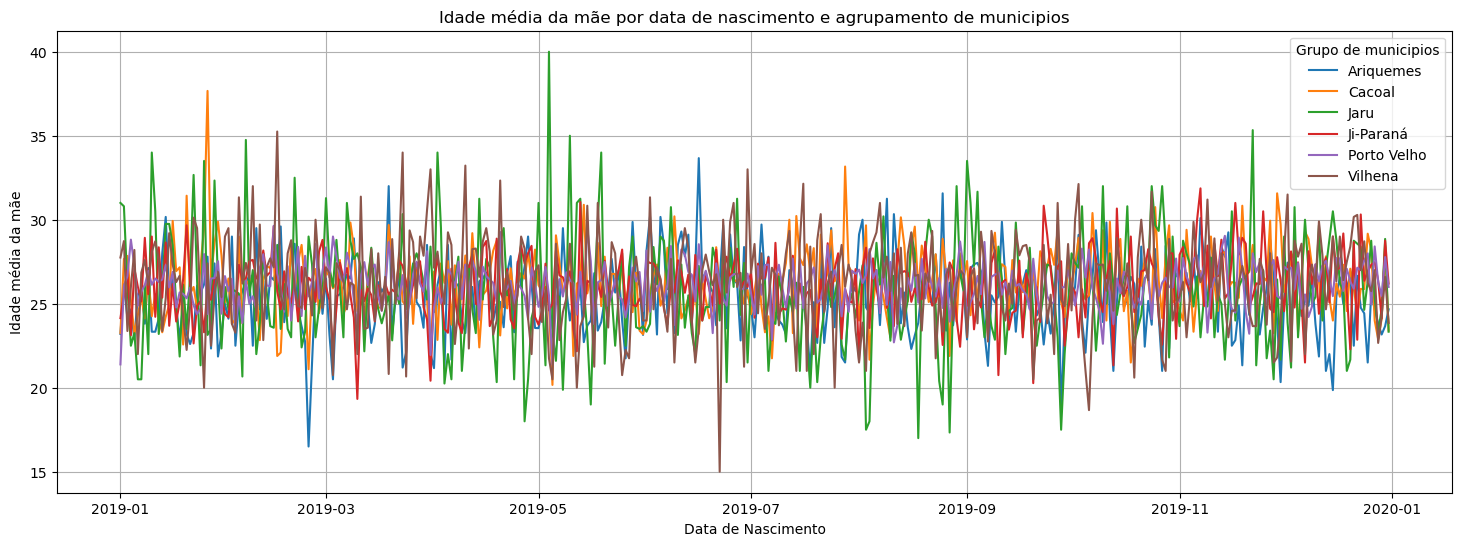

In [51]:
# converter a variável 'DTNASC' de object p/ datetime
sinasc_raw['DTNASC'] = pd.to_datetime(sinasc_raw['DTNASC'])

# coluna com as regiões imediatas
sinasc_raw['agrupMun'] = sinasc_raw['munResNome'].map(imediatas)

# calculo da idade media da mae por 'DTNASC' e 'agrupMun'
idade_media_mae = sinasc_raw.groupby(['DTNASC', 'agrupMun'])['IDADEMAE'].mean().reset_index()

# criar gráfico
plt.figure(figsize = (18, 6))

# bloco for para plotar os dados por agrupamento de municipio
for agrupamento in idade_media_mae['agrupMun'].unique():
    dados_plot = idade_media_mae[idade_media_mae['agrupMun'] == agrupamento] # filtro por agrupamento
    plt.plot(dados_plot['DTNASC'], dados_plot['IDADEMAE'], label = agrupamento) # plotar dados (data de nascimento e idade media) por agrupamento 

# configurações adicionais do gráfico
plt.title("Idade média da mãe por data de nascimento e agrupamento de municipios") # título do gráfico
plt.xlabel("Data de Nascimento") # configuração do texto do eixo x
plt.ylabel("Idade média da mãe") # configuração do texto do eixo y
plt.legend(title = "Grupo de municipios") # adiciona legenda ao gráfico
plt.grid(True) # mantem linhas de grade
plt.show()

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


In [102]:
IDH = {"Porto Velho": "Alto",
"Vilhena": "Alto",
"Cacoal": "Alto",
"Ji-Paraná": "Alto",
"Pimenta Bueno": "Alto",
"Ariquemes": "Alto",
"Rolim de Moura": "Alto",
"Cerejeiras": "Médio",
"Jaru": "Médio",
"Colorado do Oeste": "Médio",
"Ouro Preto do Oeste": "Médio",
"Espigão D'Oeste": "Médio",
"Santa Luzia D'Oeste": "Médio",
"Pimenteiras do Oeste": "Médio",
"Presidente Médici": "Médio",
"Castanheiras": "Médio",
"Guajará-Mirim": "Médio",
"Chupinguaia": "Médio",
"Cabixi": "Médio",
"Candeias do Jamari": "Médio",
"São Felipe D'Oeste": "Médio",
"Cacaulândia": "Médio",
"São Miguel do Guaporé": "Médio",
"Mirante da Serra": "Médio",
"Alvorada D'Oeste": "Médio",
"Teixeirópolis": "Médio",
"Nova Brasilândia D'Oeste": "Médio",
"Rio Crespo": "Médio",
"Primavera de Rondônia": "Médio",
"Alta Floresta D'Oeste": "Médio",
"Ministro Andreazza": "Médio",
"Novo Horizonte do Oeste": "Médio",
"Vale do Paraíso": "Médio",
"Alto Paraíso": "Médio",
"Parecis": "Médio",
"Buritis": "Médio",
"Itapuã do Oeste": "Médio",
"Corumbiara": "Médio",
"Cujubim": "Médio",
"Costa Marques": "Médio",
"São Francisco do Guaporé": "Médio",
"Urupá": "Médio",
"Monte Negro": "Médio",
"Seringueiras": "Baixo",
"Governador Jorge Teixeira": "Baixo",
"Machadinho D'Oeste": "Baixo",
"Campo Novo de Rondônia": "Baixo",
"Alto Alegre dos Parecis": "Baixo",
"Theobroma": "Baixo",
"Nova União": "Baixo",
"Nova Mamoré": "Baixo",
"Vale do Anari": "Baixo"}

In [120]:
IFDM = {"Ariquemes": "Desenvolvimento Moderado",
"Vilhena": "Desenvolvimento Moderado",
"Pimenta Bueno": "Desenvolvimento Moderado",
"Porto Velho": "Desenvolvimento Moderado",
"Ji-Paraná": "Desenvolvimento Moderado",
"Cacoal": "Desenvolvimento Moderado",
"Santa Luzia D'Oeste": "Desenvolvimento Moderado",
"Rolim de Moura": "Desenvolvimento Moderado",
"Chupinguaia": "Desenvolvimento Moderado",
"São Miguel do Guaporé": "Desenvolvimento Moderado",
"Pimenteiras do Oeste": "Desenvolvimento Moderado",
"Teixeirópolis": "Desenvolvimento Moderado",
"Colorado do Oeste": "Desenvolvimento Moderado",
"Jaru": "Desenvolvimento Moderado",
"Rio Crespo": "Desenvolvimento Moderado",
"Primavera de Rondônia": "Desenvolvimento Moderado",
"Alta Floresta D'Oeste": "Desenvolvimento Moderado",
"Ouro Preto do Oeste": "Desenvolvimento Moderado",
"São Francisco do Guaporé": "Desenvolvimento Moderado",
"Candeias do Jamari": "Desenvolvimento Moderado",
"Buritis": "Desenvolvimento Moderado",
"São Felipe D'Oeste": "Desenvolvimento Moderado",
"Presidente Médici": "Desenvolvimento Moderado",
"Cerejeiras": "Desenvolvimento Moderado",
"Monte Negro": "Desenvolvimento Moderado",
"Urupá": "Desenvolvimento Moderado",
"Espigão D'Oeste": "Desenvolvimento Baixo",
"Seringueiras": "Desenvolvimento Baixo",
"Alvorada D'Oeste": "Desenvolvimento Baixo",
"Itapuã do Oeste": "Desenvolvimento Baixo",
"Cabixi": "Desenvolvimento Baixo",
"Novo Horizonte do Oeste": "Desenvolvimento Baixo",
"Nova Brasilândia D'Oeste": "Desenvolvimento Baixo",
"Vale do Paraíso": "Desenvolvimento Baixo",
"Corumbiara": "Desenvolvimento Baixo",
"Alto Paraíso": "Desenvolvimento Baixo",
"Cacaulândia": "Desenvolvimento Baixo",
"Vale do Anari": "Desenvolvimento Baixo",
"Ministro Andreazza": "Desenvolvimento Baixo",
"Costa Marques": "Desenvolvimento Baixo",
"Nova União": "Desenvolvimento Baixo",
"Guajará-Mirim": "Desenvolvimento Baixo",
"Mirante da Serra": "Desenvolvimento Baixo",
"Parecis": "Desenvolvimento Baixo",
"Castanheiras": "Desenvolvimento Baixo",
"Theobroma": "Desenvolvimento Baixo",
"Machadinho D'Oeste": "Desenvolvimento Baixo",
"Campo Novo de Rondônia": "Desenvolvimento Baixo",
"Nova Mamoré": "Desenvolvimento Baixo",
"Cujubim": "Desenvolvimento Baixo",
"Alto Alegre dos Parecis": "Desenvolvimento Baixo",
"Governador Jorge Teixeira": "Desenvolvimento Baixo"}

In [159]:
PIB = {"Porto Velho": "Acima de 1 Bi",
"Ji-Paraná": "Acima de 1 Bi",
"Vilhena": "Acima de 1 Bi",
"Ariquemes": "Acima de 1 Bi",
"Cacoal": "Acima de 1 Bi",
"Jaru": "Acima de 1 Bi",
"Rolim de Moura": "Acima de 1 Bi",
"Pimenta Bueno": "Acima de 1 Bi",
"Guajará-Mirim": "Acima de 500 Mi",
"Ouro Preto do Oeste": "Acima de 500 Mi",
"Buritis": "Acima de 500 Mi",
"Machadinho D'Oeste": "Acima de 500 Mi",
"Espigão D'Oeste": "Acima de 500 Mi",
"São Miguel do Guaporé": "Acima de 500 Mi",
"Candeias do Jamari": "Acima de 500 Mi",
"Nova Mamoré": "Acima de 500 Mi",
"Cerejeiras": "Acima de 500 Mi",
"Alta Floresta D'Oeste": "Acima de 300 Mi",
"Presidente Médici": "Acima de 300 Mi",
"Cujubim": "Acima de 300 Mi",
"Nova Brasilândia D'Oeste": "Acima de 300 Mi",
"Alto Paraíso": "Acima de 300 Mi",
"São Francisco do Guaporé": "Acima de 300 Mi",
"Colorado do Oeste": "Acima de 300 Mi",
"Monte Negro": "Acima de 200 Mi",
"Alto Alegre dos Parecis": "Acima de 200 Mi",
"Campo Novo de Rondônia": "Acima de 200 Mi",
"Alvorada D'Oeste": "Acima de 200 Mi",
"Chupinguaia": "Acima de 100 Mi",
"Corumbiara": "Acima de 100 Mi",
"Ministro Andreazza": "Acima de 100 Mi",
"Urupá": "Acima de 100 Mi",
"Costa Marques": "Acima de 100 Mi",
"Seringueiras": "Acima de 100 Mi",
"Mirante da Serra": "Acima de 100 Mi",
"Governador Jorge Teixeira": "Acima de 100 Mi",
"Theobroma": "Acima de 100 Mi",
"Santa Luzia D'Oeste": "Acima de 100 Mi",
"Novo Horizonte do Oeste": "Acima de 100 Mi",
"Itapuã do Oeste": "Acima de 100 Mi",
"Vale do Paraíso": "Acima de 100 Mi",
"Cacaulândia": "Acima de 100 Mi",
"Cabixi": "Acima de 100 Mi",
"Vale do Anari": "Acima de 100 Mi",
"Nova União": "Até 100 Mi",
"Parecis": "Até 100 Mi",
"Rio Crespo": "Até 100 Mi",
"Pimenteiras do Oeste": "Até 100 Mi",
"Teixeirópolis": "Até 100 Mi",
"São Felipe D'Oeste": "Até 100 Mi",
"Castanheiras": "Até 100 Mi",
"Primavera de Rondônia": "Até 100 Mi"}

### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [104]:
# coluna com a marcação do IDH
sinasc_raw['IDH'] = sinasc_raw['munResNome'].map(IDH)

In [106]:
print("Valores únicos da variável IDH: ", sinasc_raw['IDH'].unique())

Valores únicos da variável IDH:  ['Médio' 'Baixo' 'Alto' nan]


In [108]:
print("Frequencia valores da variável IDH: ", sinasc_raw['IDH'].value_counts())

Frequencia valores da variável IDH:  IDH
Alto     16855
Médio     8346
Baixo     1826
Name: count, dtype: int64


In [110]:
print("Quantidade de valores NaN na coluna IDH: ", sinasc_raw['IDH'].isna().sum())

Quantidade de valores NaN na coluna IDH:  1


In [183]:
# método groupby para calcular as principais estatisticas da variável IDADEMAE por IDH
apgar1_por_idade_mae = sinasc_raw.groupby('IDH')['IDADEMAE'].agg(['mean','median','max','min','std','var'])
apgar1_por_idade_mae

,mean,median,max,min,std,var
IDH,,,,,,
Alto,26.280332,26.0,47,12,6.415374,41.157021
Baixo,25.326944,25.0,46,13,6.194908,38.376885
Médio,25.884855,25.0,53,11,6.353274,40.364092


In [193]:
# método groupby para calcular as principais estatisticas da variável APGAR1 por IDH
apgar1_por_idh = sinasc_raw.groupby('IDH')['APGAR1'].agg(['mean','median','max','min','std','var'])
apgar1_por_idh

,mean,median,max,min,std,var
IDH,,,,,,
Alto,8.172839,8.0,10.0,0.0,0.961518,0.924516
Baixo,8.017014,8.0,10.0,0.0,1.040232,1.082083
Médio,8.092265,8.0,10.0,0.0,1.014941,1.030105


### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [123]:
# coluna com a marcação do IFDM
sinasc_raw['IFDM'] = sinasc_raw['munResNome'].map(IFDM)

In [125]:
print("Valores únicos da variável IFDM: ", sinasc_raw['IFDM'].unique())

Valores únicos da variável IFDM:  ['Desenvolvimento Moderado' 'Desenvolvimento Baixo' nan]


In [127]:
print("Frequencia valores da variável IFDM: ", sinasc_raw['IFDM'].value_counts())

Frequencia valores da variável IFDM:  IFDM
Desenvolvimento Moderado    21946
Desenvolvimento Baixo        5081
Name: count, dtype: int64


In [129]:
print("Quantidade de valores NaN na coluna IFDM: ", sinasc_raw['IFDM'].isna().sum())

Quantidade de valores NaN na coluna IFDM:  1


In [185]:
# método groupby para calcular as principais estatisticas da variável IDADEMAE por IFDM
idade_mae_por_ifdm = sinasc_raw.groupby('IFDM')['IDADEMAE'].agg(['mean','median','max','min','std','var'])
idade_mae_por_ifdm

,mean,median,max,min,std,var
IFDM,,,,,,
Desenvolvimento Baixo,25.535131,25.0,52,11,6.363435,40.493303
Desenvolvimento Moderado,26.223139,26.0,53,12,6.385869,40.779325


In [191]:
# método groupby para calcular as principais estatisticas da variável APGAR1 por IFDM
apgar1_por_ifdm = sinasc_raw.groupby('IFDM')['APGAR1'].agg(['mean','median','max','min','std','var'])
apgar1_por_ifdm

,mean,median,max,min,std,var
IFDM,,,,,,
Desenvolvimento Baixo,8.016209,8.0,10.0,0.0,1.036376,1.074075
Desenvolvimento Moderado,8.165463,8.0,10.0,0.0,0.970513,0.941895


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [161]:
# coluna com a marcação do IFDM
sinasc_raw['PIB'] = sinasc_raw['munResNome'].map(PIB)

In [163]:
print("Valores únicos da variável PIB: ", sinasc_raw['PIB'].unique())

Valores únicos da variável PIB:  ['Acima de 300 Mi' 'Acima de 200 Mi' 'Acima de 100 Mi' 'Acima de 1 Bi'
 'Até 100 Mi' 'Acima de 500 Mi' nan]


In [165]:
print("Frequencia valores da variável PIB: ", sinasc_raw['PIB'].value_counts())

Frequencia valores da variável PIB:  PIB
Acima de 1 Bi      17736
Acima de 500 Mi     4304
Acima de 100 Mi     1952
Acima de 300 Mi     1880
Acima de 200 Mi      724
Até 100 Mi           431
Name: count, dtype: int64


In [167]:
print("Quantidade de valores NaN na coluna PIB: ", sinasc_raw['PIB'].isna().sum())

Quantidade de valores NaN na coluna PIB:  1


In [187]:
# método groupby para calcular as principais estatisticas da variável IDADEMAE por PIB
idade_mae_por_pib = sinasc_raw.groupby('PIB')['IDADEMAE'].agg(['mean','median','max','min','std','var'])
idade_mae_por_pib

,mean,median,max,min,std,var
PIB,,,,,,
Acima de 1 Bi,26.265562,26.0,47,12,6.403777,41.008357
Acima de 100 Mi,25.662910,25.0,52,12,6.306384,39.770474
Acima de 200 Mi,25.323204,25.0,44,13,6.064473,36.777829
Acima de 300 Mi,25.833511,25.0,53,11,6.273901,39.361835
Acima de 500 Mi,25.782528,25.0,53,13,6.469479,41.854159
Até 100 Mi,26.515081,26.0,41,14,5.925831,35.115470


In [189]:
# método groupby para calcular as principais estatisticas da variável APGAR1 por PIB
apgar1_por_pib = sinasc_raw.groupby('PIB')['APGAR1'].agg(['mean','median','max','min','std','var'])
apgar1_por_pib

,mean,median,max,min,std,var
PIB,,,,,,
Acima de 1 Bi,8.167346,8.0,10.0,0.0,0.953605,0.909363
Acima de 100 Mi,8.045782,8.0,10.0,0.0,0.968077,0.937172
Acima de 200 Mi,8.110497,8.0,10.0,0.0,1.133643,1.285146
Acima de 300 Mi,7.955295,8.0,10.0,0.0,1.084366,1.175849
Acima de 500 Mi,8.156886,8.0,10.0,0.0,1.012750,1.025662
Até 100 Mi,7.969838,8.0,10.0,1.0,1.179878,1.392111
